In [1]:
# Compare CRM variables at single column between two simulations 
import cartopy.crs as ccrs
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
import numpy as np
import pickle
import xarray as xr
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import sys
sys.setrecursionlimit(9000)

In [2]:
# Change this part
Year  = 2008
Month = 10
Day   = 1
Hour  = 48600
# Set the location of the column
Center_lon = 275.0
Center_lat = -15.0
Date  = str(Year)+'-'+str("{0:0=2d}".format(Month))+'-'+str("{0:0=2d}".format(Day))+'-'+str(Hour)
Date

'2008-10-01-48600'

In [3]:
# Model output path and file name
PATH = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
FNAME = 'Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera.cam.h0.'+Date+'.nc'
PATH2 = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z200m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
FNAME2 = 'Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z200m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera.cam.h0.'+Date+'.nc'
#PATH   = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v4_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_125z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
#FNAME  = 'Control_testDX_CRM_output_NOtwin_v4_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_125z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera.cam.h0.'+Date+'.nc'
#PATH2  = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v4_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_125z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
#FNAME2 = 'Control_testDX_CRM_output_NOtwin_v4_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_125z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera.cam.h0.'+Date+'.nc'

In [4]:
# Read data
FILE = nc.Dataset(PATH+FNAME, mode = 'r') 
FILE2 = nc.Dataset(PATH2+FNAME2, mode = 'r')

In [5]:
# Function calculate the distance between two points
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

In [6]:
# Read coordinates
lon = FILE.variables['lon']
lat = FILE.variables['lat']
Z3  = FILE.variables['Z3']

In [7]:
# Find the column index corresponds to the minimum distance
ddmin = 99999999.0
for il in range(4166):
    dd = distance(lat[il], lon[il], Center_lat, Center_lon)
    if dd<ddmin:
        ddmin = dd
        minindex = il
print(ddmin,minindex)

96.40873334967499 3425


In [8]:
# Read CRM variables
CRMT   = FILE.variables['CRM_T']  
CRMQC  = FILE.variables['CRM_QC']
CRMQI  = FILE.variables['CRM_QI']
CRMTK  = FILE.variables['CRM_TK']
CRMTKH = FILE.variables['CRM_TKH']
CRMU   = FILE.variables['CRM_U']
CRMW   = FILE.variables['CRM_W']

CRMT2   = FILE2.variables['CRM_T']
CRMQC2  = FILE2.variables['CRM_QC']
CRMQI2  = FILE2.variables['CRM_QI']
CRMTK2  = FILE2.variables['CRM_TK']
CRMTKH2 = FILE2.variables['CRM_TKH']
CRMU2   = FILE2.variables['CRM_U']
CRMW2   = FILE2.variables['CRM_W']

In [9]:
# Find the CRM data at the selected column
colnum = minindex
Z3p = Z3[0,:,colnum]
CRMTp  = CRMT[0,:,0,:,colnum]
CRMTp2 = CRMT2[0,:,0,:,colnum]
CRMUp  = CRMU[0,:,0,:,colnum]
CRMUp2 = CRMU2[0,:,0,:,colnum]
CRMWp  = CRMW[0,:,0,:,colnum]
CRMWp2 = CRMW2[0,:,0,:,colnum]
CRMTKp  = CRMTK[0,:,0,:,colnum]
CRMTKp2 = CRMTK2[0,:,0,:,colnum]
CRMTKHp  = CRMTKH[0,:,0,:,colnum]
CRMTKHp2 = CRMTKH2[0,:,0,:,colnum]
CRMQCp  = CRMQC[0,:,0,:,colnum]
CRMQCp2 = CRMQC2[0,:,0,:,colnum]
x      = list(range(0,32))
# Will change this part in the next model simulation
# This is done because crm_nz=120
Z3p = Z3p[::-1]
Z3p = Z3p[0:120]

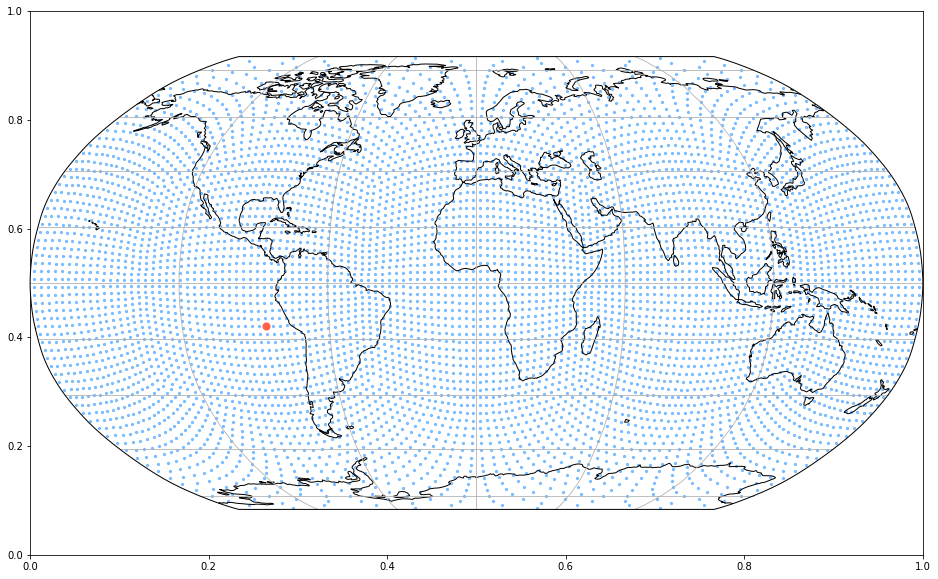

In [10]:
# Check the location of the selected column
#-- create figure and axes object
fig, ax = plt.subplots(figsize=(16,10))

#-- choose map projection
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
#-- add coastlines, country border lines, and grid lines
ax.coastlines()
ax.gridlines()
plt.scatter(lon[1:6144], lat[1:6144],
            color="dodgerblue",
            s=5,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important
plt.scatter(lon[colnum], lat[colnum],
            color="tomato",
            s=50,
            alpha=1,
            transform=ccrs.PlateCarree()) ## Important
#plt.show()


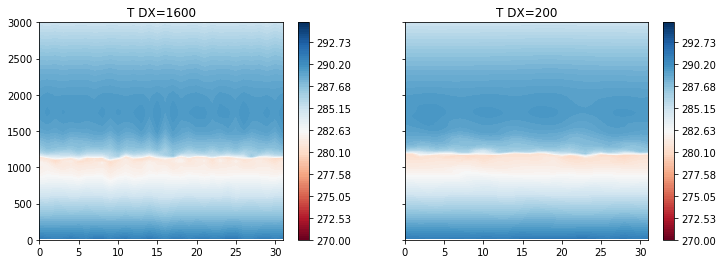

In [11]:
# Plot the CRM_T
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(270, 295, 100)
cs = ax1.contourf(x,Z3p,  CRMTp,levels=levels,cmap = 'RdBu')
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('T DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMTp2,levels=levels,cmap = 'RdBu')
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('T DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

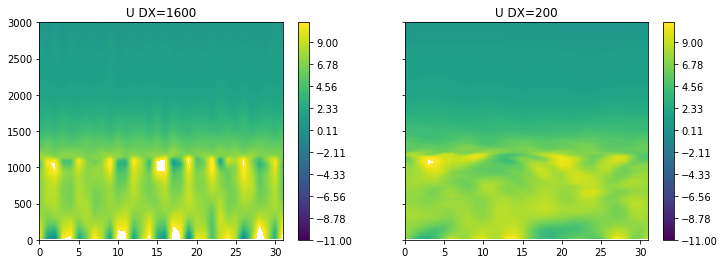

In [12]:
# Plot the CRM_U
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(-11, 11, 100)
cs = ax1.contourf(x,Z3p,  CRMUp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('U DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMUp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('U DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

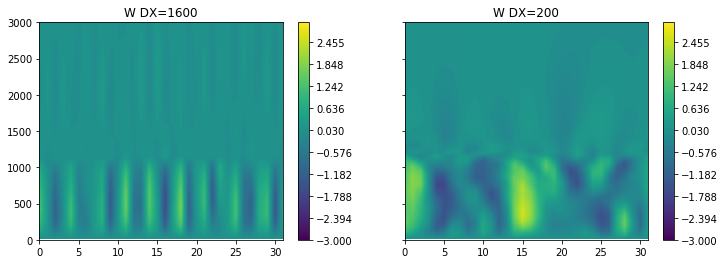

In [13]:
# Plot the CRM_W
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(-3, 3, 100)
cs = ax1.contourf(x,Z3p,  CRMWp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('W DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMWp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('W DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

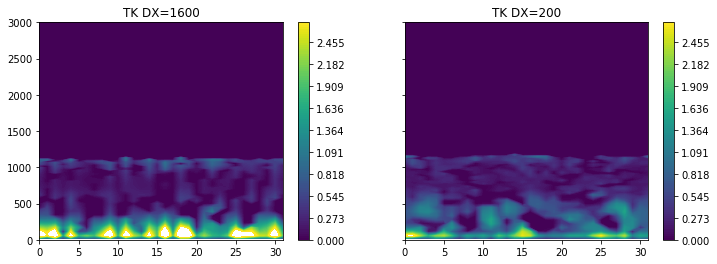

In [14]:
# Plot the CRM_TK
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(0, 2.70, 100)
cs = ax1.contourf(x,Z3p,  CRMTKp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('TK DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMTKp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('TK DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

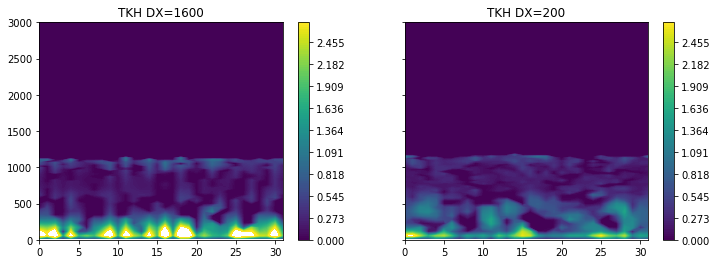

In [15]:
# Plot the CRM_TKH
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(0, 2.70, 100)
cs = ax1.contourf(x,Z3p,  CRMTKHp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('TKH DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMTKHp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('TKH DX=200')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

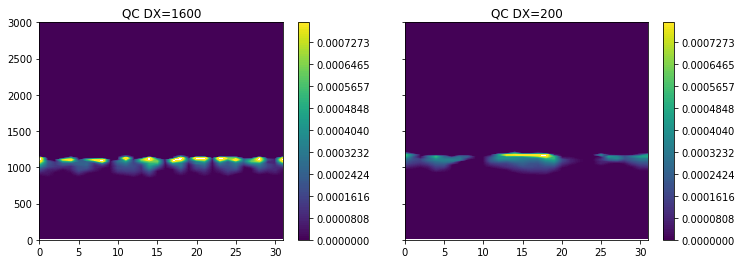

In [16]:
# Plot the CRM_QC
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(0, 0.00080, 100)
cs = ax1.contourf(x,Z3p,  CRMQCp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('QC DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMQCp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('QC DX=200')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

In [ ]:
CRMFLNS   = FILE.variables['CRM_FLNS']
CRMFLNSC   = FILE.variables['CRM_FLNSC']
CRMW   = FILE.variables['CRM_FLNT']
CRMW   = FILE.variables['CRM_FLNTC']
CRMW   = FILE.variables['CRM_FSNS']
CRMW   = FILE.variables['CRM_FSNSC']